## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Dataset

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2024-03-06 05:39:06.634854: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 05:39:06.634992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 05:39:06.794681: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
x_train[0].shape

(32, 32, 3)

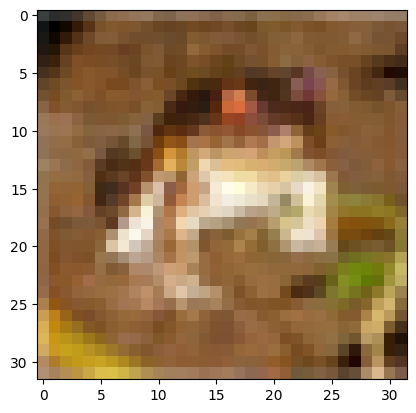

In [8]:
plt.imshow(x_train[0])

In [9]:
import matplotlib.pyplot as plt

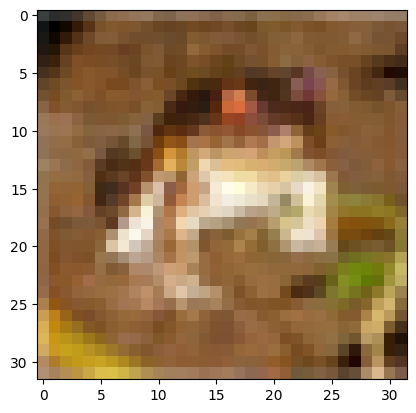

In [10]:
# FROG
plt.imshow(x_train[0])

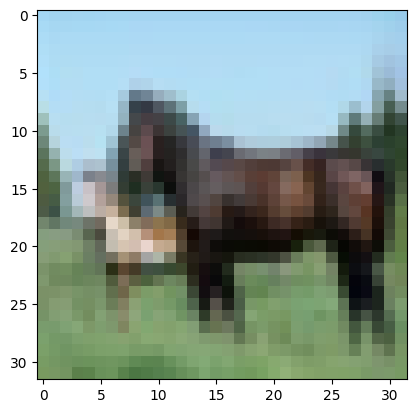

In [11]:
# HORSE
plt.imshow(x_train[12])

## PreProcessing

In [12]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [13]:
x_train[0].shape

(32, 32, 3)

In [14]:
x_train[0].max()

255

In [15]:
x_train = x_train/255

In [16]:
x_test = x_test/255

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
x_test.shape

(10000, 32, 32, 3)

In [19]:
x_train[0].min()

0.0

## Labels

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train.shape

(50000, 1)

In [22]:
y_train[0]

array([6], dtype=uint8)

In [23]:
y_cat_train = to_categorical(y_train,10)

In [24]:
y_cat_train.shape

(50000, 10)

In [25]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [26]:
y_cat_test = to_categorical(y_test,10)

## Buiding the Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

# FIRST SET OF LAYERS 

# CONOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# SECOND SET OF LAYERS

# CONOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN MAGES FROM 28 BY 28 TO 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## Train the Model

In [32]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3632 - loss: 1.7428 - val_accuracy: 0.5024 - val_loss: 1.3872
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5697 - loss: 1.2238 - val_accuracy: 0.5834 - val_loss: 1.1789
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6368 - loss: 1.0409 - val_accuracy: 0.6375 - val_loss: 1.0443
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6852 - loss: 0.9189 - val_accuracy: 0.6490 - val_loss: 1.0366
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7172 - loss: 0.8217 - val_accuracy: 0.6271 - val_loss: 1.1874
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7416 - loss: 0.7565 - val_accuracy: 0.6700 - val_loss: 0.9938
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7643 - loss: 0.6925 - val_accuracy: 0.6459 - val_loss: 1.2295
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7812 -

## Evaluation the Model

In [33]:
losses = pd.DataFrame(model.history.history)

In [34]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.44654,1.537821,0.5024,1.387193
1,0.58084,1.192065,0.5834,1.178866
2,0.64180,1.029286,0.6375,1.044295
3,0.68436,0.920260,0.6490,1.036629
4,0.71370,0.835251,0.6271,1.187372


<Axes: >

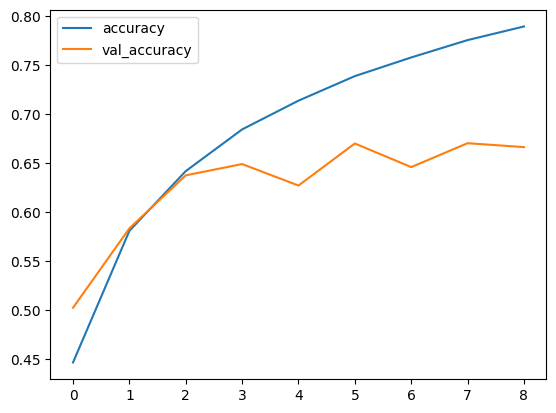

In [35]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

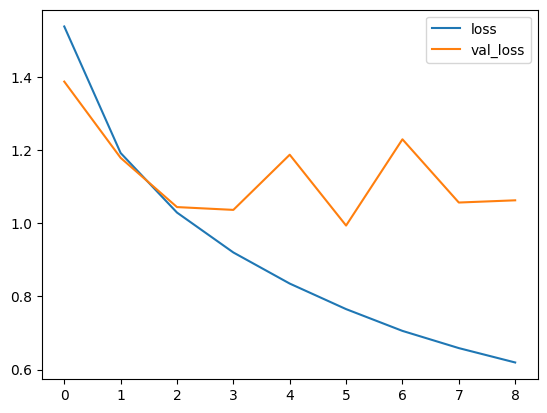

In [36]:
losses[['loss', 'val_loss']].plot()

In [37]:
model.metrics_names

['loss', 'compile_metrics']

In [38]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[1.0627714395523071, 0.6662999987602234]


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [41]:
y_cat_test.shape

(10000, 10)

In [42]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [43]:
confusion_matrix(y_test,predictions)

array([[692,  22,  91,  36,  23,   4,  24,   5,  79,  24],
       [ 19, 815,  16,  20,   3,   1,  21,   2,  35,  68],
       [ 49,   7, 652,  76,  50,  36,  82,  23,  19,   6],
       [ 15,  20, 111, 539,  53,  79, 125,  27,  16,  15],
       [ 17,   8, 153,  88, 571,  20,  93,  35,  12,   3],
       [  6,   7, 108, 272,  53, 428,  64,  48,   8,   6],
       [  2,  11,  71,  61,  23,   8, 810,   4,   4,   6],
       [ 21,  10,  75,  71,  53,  36,  31, 679,   2,  22],
       [ 70,  32,  29,  36,   8,   1,  13,   4, 779,  28],
       [ 30, 117,  29,  18,  13,   7,  26,  16,  46, 698]])

<Axes: >

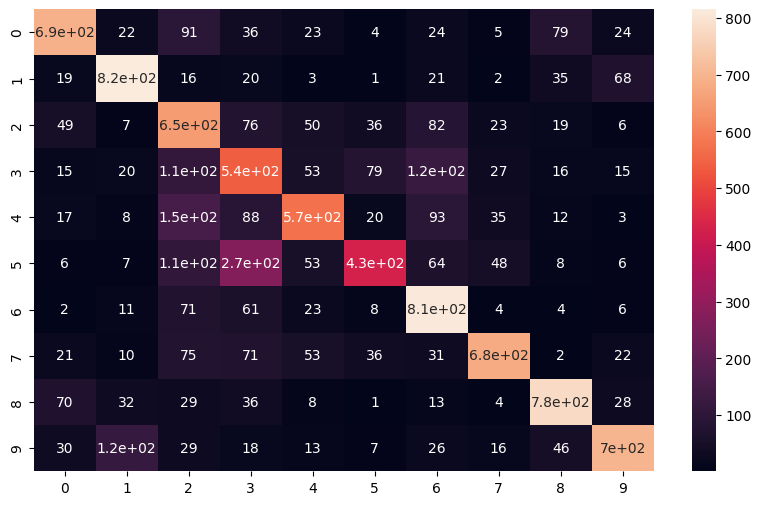

In [44]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1000
           1       0.78      0.81      0.80      1000
           2       0.49      0.65      0.56      1000
           3       0.44      0.54      0.49      1000
           4       0.67      0.57      0.62      1000
           5       0.69      0.43      0.53      1000
           6       0.63      0.81      0.71      1000
           7       0.81      0.68      0.74      1000
           8       0.78      0.78      0.78      1000
           9       0.80      0.70      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



## Predicting a Given Image

In [46]:
my_image = x_test[10]

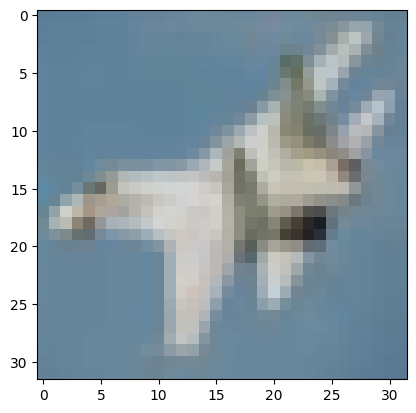

In [47]:
plt.imshow(my_image)

In [48]:
y_test[0]

array([3], dtype=uint8)

In [49]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[3.3544341e-01, 3.6797969e-04, 9.4531151e-03, 4.4299118e-02,
        1.8424955e-01, 1.2110682e-02, 1.5890237e-02, 2.4747010e-02,
        3.7076044e-01, 2.6784257e-03]], dtype=float32)

In [50]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([8])

## Good Job!